In [130]:
import json

from pathlib import Path

import pandas as pd
import numpy as np

import biopsykit as bp


from biopsykit.classification.model_selection import SklearnPipelinePermuter
import pepbench.plotting
from pepbench.io import load_best_performing_algos, load_preprocessed_training_data, compute_abs_error, get_best_pipeline_results, get_best_estimator, get_pipeline_steps

import pingouin as pg

import matplotlib.pyplot as plt

%matplotlib widget
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
model_path = Path("../../results/models")
data_path = Path("../../results/data")
result_path = Path("../../results")

In [72]:
input_data = pd.read_csv(data_path.joinpath("train_data_no_outlier_correction.csv"), index_col=[0,1,2,3,4])
input_data

arbol2017-isoelectric-crossings  \
      participant phase         heartbeat_id_reference b_point_sample_reference                                    
0     GDN0005     HoldingBreath 0                      388.0                                               438.0   
1     GDN0005     HoldingBreath 1                      404.0                                               340.0   
2     GDN0005     HoldingBreath 3                      376.0                                               382.0   
3     GDN0005     HoldingBreath 4                      390.0                                               394.0   
4     GDN0005     HoldingBreath 5                      386.0                                               398.0   
...                                                                                                          ...   
11219 VP_032      Talk          39                     310.0                                               335.0   
11220 VP_032      Talk          40                     322.0                                               331.0   
11221 VP_032      Talk          41                     340.0                                               317.0   
11222 VP_032      Talk          42                     311.0                                               365.0   
11223 VP_032      Talk          43                     307.0                                               342.0   

                                                                                 arbol2017-second-derivative  \
      participant phase         heartbeat_id_reference b_point_sample_reference                                
0     GDN0005     HoldingBreath 0                      388.0                                           398.0   
1     GDN0005     HoldingBreath 1                      404.0                                           350.0   
2     GDN0005     HoldingBreath 3                      376.0                                           296.0   
3     GDN0005     HoldingBreath 4                      390.0                                           344.0   
4     GDN0005     HoldingBreath 5                      386.0                                           312.0   
...                                                                                                      ...   
11219 VP_032      Talk          39                     310.0                                           276.0   
11220 VP_032      Talk          40                     322.0                                           298.0   
11221 VP_032      Talk          41                     340.0                                           300.0   
11222 VP_032      Talk          42                     311.0                                           324.0   
11223 VP_032      Talk          43                     307.0                                           313.0   

                                                                                 arbol2017-third-derivative  \
      participant phase         heartbeat_id_reference b_point_sample_reference                               
0     GDN0005     HoldingBreath 0                      388.0                                          394.0   
1     GDN0005     HoldingBreath 1                      404.0                                          244.0   
2     GDN0005     HoldingBreath 3                      376.0                                          386.0   
3     GDN0005     HoldingBreath 4                      390.0                                          396.0   
4     GDN0005     HoldingBreath 5                      386.0                                          388.0   
...                                                                                                     ...   
11219 VP_032      Talk          39                     310.0                                          324.0   
11220 VP_032      Talk          40                     322.0                                          330.0   
11221

In [109]:
permuter1 = SklearnPipelinePermuter.from_pickle(model_path.joinpath("RandomForest_300_Estimators_No_Outlier_Correction.pkl"))
permuter1.metric_summary()

true_labels  \
pipeline_reduce_dim pipeline_clf                                                               
SelectKBest         RandomForestRegressor  [370.0, 346.0, 374.0, 316.0, 336.0, 322.0, 334...   

                                                                           true_labels_folds  \
pipeline_reduce_dim pipeline_clf                                                               
SelectKBest         RandomForestRegressor  [[370.0, 346.0, 374.0, 316.0, 336.0, 322.0, 33...   

                                                                            predicted_labels  \
pipeline_reduce_dim pipeline_clf                                                               
SelectKBest         RandomForestRegressor  [366.68346662596656, 340.1282764550265, 376.02...   

                                                                      predicted_labels_folds  \
pipeline_reduce_dim pipeline_clf                                                               
SelectKBest         RandomForestRegressor  [[366.68346662596656, 340.1282764550265, 376.0...   

                                                                               train_indices  \
pipeline_reduce_dim pipeline_clf                                                               
SelectKBest         RandomForestRegressor  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   

                                                                         train_indices_folds  \
pipeline_reduce_dim pipeline_clf                                                               
SelectKBest         RandomForestRegressor  [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13...   

                                                                                test_indices  \
pipeline_reduce_dim pipeline_clf                                                               
SelectKBest         RandomForestRegressor  [2257, 2258, 2259, 2260, 2261, 2262, 2263, 226...   

                                                                          test_indices_folds  \
pipeline_reduce_dim pipeline_clf                                                               
SelectKBest         RandomForestRegressor  [[2257, 2258, 2259, 2260, 2261, 2262, 2263, 22...   

                                           mean_test_neg_mean_absolute_error  \
pipeline_reduce_dim pipeline_clf                                               
SelectKBest         RandomForestRegressor                           7.691434   

                                           std_test_neg_mean_absolute_error  \
pipeline_reduce_dim pipeline_clf                                              
SelectKBest         RandomForestRegressor                          0.729774   

                                           test_neg_mean_absolute_error_fold_0  \
pipeline_reduce_dim pipeline_clf                                                 
SelectKBest         RandomForestRegressor                             8.766877   

                                           test_neg_mean_absolute_error_fold_1  \
pipeline_reduce_dim pipeline_clf                                                 
SelectKBest         RandomForestRegressor                             7.584422   

                                           test_neg_mean_absolute_error_fold_2  \
pipeline_reduce_dim pipeline_clf                                                 
SelectKBest         RandomForestRegressor                             8.144433   

                                           test_neg_mean_absolute_error_fold_3  \
pipeline_reduce_dim pipeline_clf                                                 
SelectKBest         RandomForestRegressor                             6.606968   

                                           test_neg_mean_absolute_error_fold_4  
pipeline_reduce_dim pipeline_clf                                                
SelectKBest         RandomForestRegressor                             7.354471

In [151]:
permuter1.best_estimator_summary()

best_estimator
pipeline_reduce_dim pipeline_clf                                                            
SelectKBest         RandomForestRegressor  [Pipeline(memory=Memory(location=cachedir\jobl...

In [ ]:
permuter1.best_hyperparameter_pipeline()

C:\Users\sebas\Development\ResearchInternship\Code\BioPsyKit\src\biopsykit\classification\model_selection\sklearn_pipeline_permuter.py:680: FutureWarning: ['param_reduce_dim__k', 'params'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  .agg(["mean", "std"])


mean_test_neg_mean_absolute_error  param_clf__max_depth  \
outer_fold                                                            
0                                   -7.638756                 100.0   
1                                   -7.844344                 100.0   
2                                   -7.738329                 100.0   
3                                   -8.096510                 100.0   
4                                   -7.814155                 100.0   

            param_clf__min_samples_leaf  param_clf__min_samples_split  \
outer_fold                                                              
0                                     2                             5   
1                                     2                             5   
2                                     2                             5   
3                                     2                             5   
4                                     2                             5   

            param_clf__n_estimators param_reduce_dim__k  \
outer_fold                                                
0                               300                 all   
1                               300                 all   
2                               300                 all   
3                               300                 all   
4                               300                 all   

                                                       params  \
outer_fold                                                      
0           {'clf__max_depth': 100, 'clf__min_samples_leaf...   
1           {'clf__max_depth': 100, 'clf__min_samples_leaf...   
2           {'clf__max_depth': 100, 'clf__min_samples_leaf...   
3           {'clf__max_depth': 100, 'clf__min_samples_leaf...   
4           {'clf__max_depth': 100, 'clf__min_samples_leaf...   

            rank_test_neg_mean_absolute_error  \
outer_fold                                      
0                                          11   
1                                           3   
2                                          11   
3                                           8   
4                                          15   

            split0_test_neg_mean_absolute_error  \
outer_fold                                        
0                                     -6.546564   
1                                     -7.389328   
2                                     -7.391737   
3                                     -8.764197   
4                                     -6.562099   

            split1_test_neg_mean_absolute_error  \
outer_fold                                        
0                                     -8.447289   
1                                     -9.436401   
2                                     -8.100237   
3                                     -8.755324   
4                                     -8.342787   

            split2_test_neg_mean_absolute_error  \
outer_fold                                        
0                                     -7.316854   
1                                     -7.560245   
2                                     -8.239998   
3                                     -7.447003   
4                                     -9.707558   

            split3_test_neg_mean_absolute_error  \
outer_fold                                        
0                                     -7.917081   
1                                     -7.115236   
2                                     -7.764220   
3                                     -7.522554   
4                                     -7.954305   

            split4_test_neg_mean_absolute_error  \
outer_fold                                        
0                                     -7.965993   
1                                     -7.720507   
2                                     -7.195454   
3                                     -7.993470   
4                                     -6.504027   

In [139]:
get_best_pipeline_results(permuter1, metric="mean_absolute_error")

true_labels  \
SelectKBest RandomForestRegressor  [370.0, 346.0, 374.0, 316.0, 336.0, 322.0, 334...   

                                                                   true_labels_folds  \
SelectKBest RandomForestRegressor  [[370.0, 346.0, 374.0, 316.0, 336.0, 322.0, 33...   

                                                                    predicted_labels  \
SelectKBest RandomForestRegressor  [366.68346662596656, 340.1282764550265, 376.02...   

                                                              predicted_labels_folds  \
SelectKBest RandomForestRegressor  [[366.68346662596656, 340.1282764550265, 376.0...   

                                                                       train_indices  \
SelectKBest RandomForestRegressor  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   

                                                                 train_indices_folds  \
SelectKBest RandomForestRegressor  [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13...   

                                                                        test_indices  \
SelectKBest RandomForestRegressor  [2257, 2258, 2259, 2260, 2261, 2262, 2263, 226...   

                                                                  test_indices_folds  \
SelectKBest RandomForestRegressor  [[2257, 2258, 2259, 2260, 2261, 2262, 2263, 22...   

                                  mean_test_neg_mean_absolute_error  \
SelectKBest RandomForestRegressor                          7.691434   

                                  std_test_neg_mean_absolute_error  \
SelectKBest RandomForestRegressor                         0.729774   

                                  test_neg_mean_absolute_error_fold_0  \
SelectKBest RandomForestRegressor                            8.766877   

                                  test_neg_mean_absolute_error_fold_1  \
SelectKBest RandomForestRegressor                            7.584422   

                                  test_neg_mean_absolute_error_fold_2  \
SelectKBest RandomForestRegressor                            8.144433   

                                  test_neg_mean_absolute_error_fold_3  \
SelectKBest RandomForestRegressor                            6.606968   

                                  test_neg_mean_absolute_error_fold_4  
SelectKBest RandomForestRegressor                            7.354471

In [140]:
best_estimator, _ = get_best_estimator(permuter1, metric="mean_absolute_error")

In [150]:
best_estimator

[Pipeline(memory=Memory(location=cachedir\joblib),
         steps=[('reduce_dim', SelectKBest()),
                ('clf',
                 RandomForestRegressor(max_depth=100, min_samples_leaf=2,
                                       n_estimators=300, n_jobs=10,
                                       random_state=RandomState(MT19937) at 0x15ACE5EF740))]), Pipeline(memory=Memory(location=cachedir\joblib),
         steps=[('reduce_dim', SelectKBest()),
                ('clf',
                 RandomForestRegressor(max_depth=60, min_samples_leaf=2,
                                       min_samples_split=5, n_estimators=300,
                                       n_jobs=10,
                                       random_state=RandomState(MT19937) at 0x15ACE5EF940))]), Pipeline(memory=Memory(location=cachedir\joblib),
         steps=[('reduce_dim', SelectKBest()),
                ('clf',
                 RandomForestRegressor(max_depth=80, min_samples_leaf=2,
                              

In [149]:
get_pipeline_steps(permuter1, input_data=input_data, metric="mean_absolute_error", step="reduce_dim", scaler=False)

[['arbol2017-isoelectric-crossings',
  'arbol2017-second-derivative',
  'arbol2017-third-derivative',
  'debski1993-second-derivative',
  'drost2022',
  'forounzafar2018',
  'lozano2007-linear-regression',
  'lozano2007-quadratic-regression',
  'sherwood1990',
  'stern1985'],
 ['arbol2017-isoelectric-crossings',
  'arbol2017-second-derivative',
  'arbol2017-third-derivative',
  'debski1993-second-derivative',
  'drost2022',
  'forounzafar2018',
  'lozano2007-linear-regression',
  'lozano2007-quadratic-regression',
  'sherwood1990',
  'stern1985'],
 ['arbol2017-isoelectric-crossings',
  'arbol2017-second-derivative',
  'arbol2017-third-derivative',
  'debski1993-second-derivative',
  'drost2022',
  'forounzafar2018',
  'lozano2007-linear-regression',
  'lozano2007-quadratic-regression',
  'sherwood1990',
  'stern1985'],
 ['arbol2017-isoelectric-crossings',
  'arbol2017-second-derivative',
  'arbol2017-third-derivative',
  'debski1993-second-derivative',
  'drost2022',
  'forounzafar2018

In [8]:
best_algo = permuter1.metric_summary().loc[("StandardScaler", "RFE", "KNeighborsRegressor")].to_frame().T
best_algo

true_labels  \
StandardScaler RFE KNeighborsRegressor  [370.0, 346.0, 374.0, 316.0, 336.0, 322.0, 334...   

                                                                        true_labels_folds  \
StandardScaler RFE KNeighborsRegressor  [[370.0, 346.0, 374.0, 316.0, 336.0, 322.0, 33...   

                                                                         predicted_labels  \
StandardScaler RFE KNeighborsRegressor  [363.085485931488, 342.61961720647287, 371.428...   

                                                                   predicted_labels_folds  \
StandardScaler RFE KNeighborsRegressor  [[363.085485931488, 342.61961720647287, 371.42...   

                                                                            train_indices  \
StandardScaler RFE KNeighborsRegressor  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   

                                                                      train_indices_folds  \
StandardScaler RFE KNeighborsRegressor  [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13...   

                                                                             test_indices  \
StandardScaler RFE KNeighborsRegressor  [2257, 2258, 2259, 2260, 2261, 2262, 2263, 226...   

                                                                       test_indices_folds  \
StandardScaler RFE KNeighborsRegressor  [[2257, 2258, 2259, 2260, 2261, 2262, 2263, 22...   

                                       mean_test_neg_mean_absolute_error  \
StandardScaler RFE KNeighborsRegressor                          8.689497   

                                       std_test_neg_mean_absolute_error  \
StandardScaler RFE KNeighborsRegressor                         0.825251   

                                       test_neg_mean_absolute_error_fold_0  \
StandardScaler RFE KNeighborsRegressor                            9.611074   

                                       test_neg_mean_absolute_error_fold_1  \
StandardScaler RFE KNeighborsRegressor                            8.498979   

                                       test_neg_mean_absolute_error_fold_2  \
StandardScaler RFE KNeighborsRegressor                            9.256969   

                                       test_neg_mean_absolute_error_fold_3  \
StandardScaler RFE KNeighborsRegressor                            7.217285   

                                       test_neg_mean_absolute_error_fold_4  
StandardScaler RFE KNeighborsRegressor                            8.863179

In [ ]:
reference_labels = permuter1.metric_summary()["true_labels"].loc[("StandardScaler", "RFE", "KNeighborsRegressor")]
reference_labels

array([370., 346., 374., ..., 180., 207., 211.])

In [15]:
abs_error_estimator = np.abs(permuter1.metric_summary()["predicted_labels"].loc[("StandardScaler", "RFE", "KNeighborsRegressor")] - reference_labels)
abs_error_estimator

array([ 9.21760988, 10.59513319,  2.55468625, ..., 17.59734523,
        8.70272322, 17.65995012])

In [9]:
np.mean(abs_error_estimator)

9.265040566679726

### Load the computed labels of algorithms that showed good performance

In [46]:
best_algos_empkins = load_best_performing_algos(result_path.joinpath("empkins_dataset_reference_q_wave").resolve(), n_best=2)
best_algos_empkins

mean       std
b_point_algorithm outlier_correction_algorithm                     
drost2022         none                          15.145887  6.024353
                  forouzanfar2018               15.532887  6.115452

In [47]:
best_algos_guardian = load_best_performing_algos(result_path.joinpath("guardian_dataset_reference_q_wave").resolve(), n_best=2)
best_algos_guardian

mean       std
b_point_algorithm            outlier_correction_algorithm                     
lozano2007-linear-regression none                          16.955571  6.242513
                             forouzanfar2018               17.493539  6.948912

In [48]:
data_best_algos_empkins = load_preprocessed_training_data(data_path.joinpath("train_data.csv"), algorithms=best_algos_empkins.index, include_reference=True)
data_best_algos_guardian = load_preprocessed_training_data(data_path.joinpath("train_data.csv"), algorithms=best_algos_guardian.index, include_reference=True)

In [49]:
abs_error_empkins = compute_abs_error(data_best_algos_empkins, data_best_algos_empkins["b_point_sample_reference"])
abs_error_empkins

drost2022_none  drost2022_forouzanfar2018
participant phase         heartbeat_id_reference                                           
GDN0005     HoldingBreath 0                                 12.0                       12.0
                          1                                 16.0                       16.0
                          3                                 10.0                       10.0
                          4                                  6.0                        6.0
                          5                                  6.0                        6.0
...                                                          ...                        ...
VP_032      Talk          39                                 8.0                        8.0
                          40                                 0.0                        0.0
                          41                                 3.0                        3.0
                          42                                43.0                       43.0
                          43                                25.0                       25.0

[10385 rows x 2 columns]

In [50]:
abs_error_guardian = compute_abs_error(data_best_algos_guardian, data_best_algos_guardian["b_point_sample_reference"])
abs_error_guardian

lozano2007-linear-regression_none  lozano2007-linear-regression_forouzanfar2018
participant phase         heartbeat_id_reference                                                                                 
GDN0005     HoldingBreath 0                                                    24.0                                          24.0
                          1                                                     0.0                                           0.0
                          3                                                    10.0                                          10.0
                          4                                                    18.0                                          16.0
                          5                                                     8.0                                           6.0
...                                                                             ...                                           ...
VP_032      Talk          39                                                    5.0                                           5.0
                          40                                                    1.0                                           6.0
                          41                                                    8.0                                           8.0
                          42                                                   40.0                                          40.0
                          43                                                   34.0                                          34.0

[10385 rows x 2 columns]

### Boxplot of the absolute errors of the machine learning prediction and the best performing algorithms against the reference data

In [56]:
data = [abs_error_estimator, abs_error_empkins["drost2022_none"], abs_error_empkins["drost2022_forouzanfar2018"], abs_error_guardian["lozano2007-linear-regression_none"], abs_error_guardian["lozano2007-linear-regression_forouzanfar2018"]]
labels = ["Best Estimator", "Drost2022", "Drost2022 - Forouzanfar 2018", "Lozano2007 Linear Regression", "Lozano2007 Linear Regression - Forouzanfar 2018"]

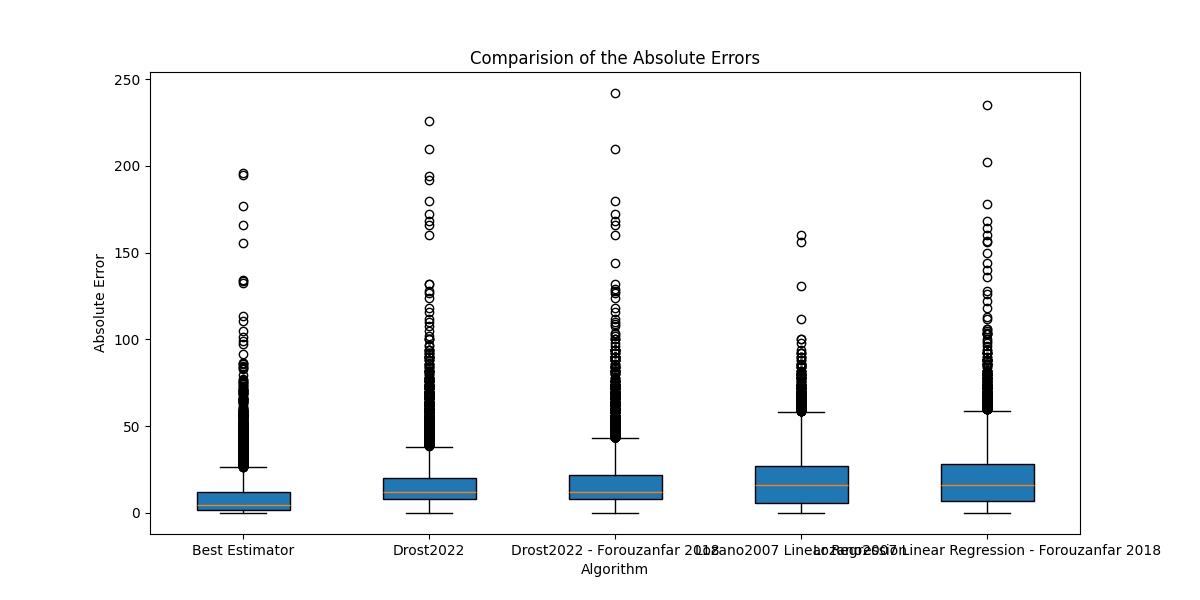

In [76]:
plt.figure(figsize=(12, 6))
plt.boxplot(data, patch_artist=True, labels=labels)
plt.title("Comparision of the Absolute Errors")
plt.xlabel("Algorithm")
plt.ylabel("Absolute Error")
plt.show()

### Residualplot of the machine learning prediction against the reference data

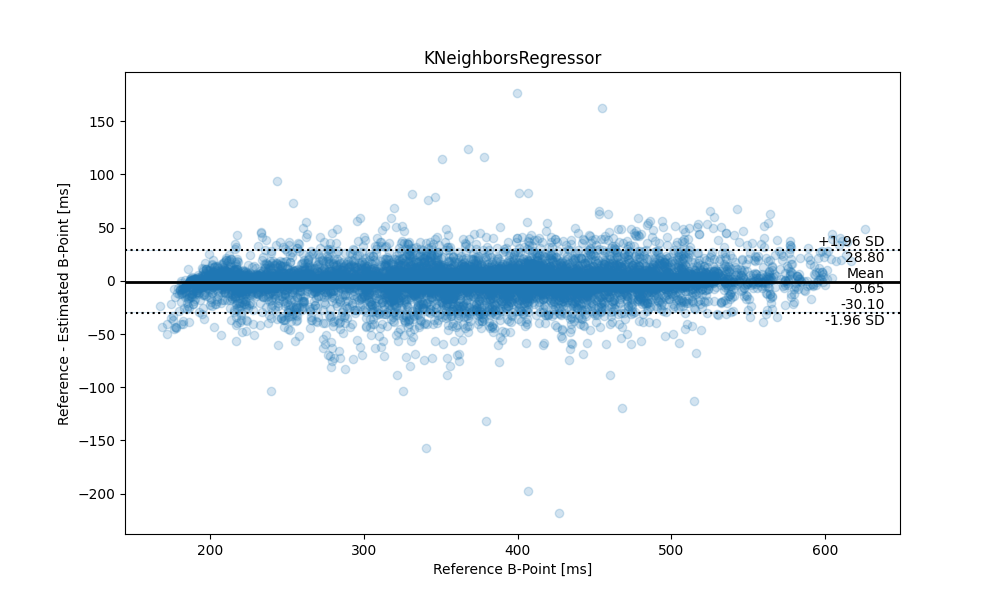

In [72]:
plt.figure(figsize=(10, 6))
pg.plot_blandaltman(best_algo["true_labels"].values[0], best_algo["predicted_labels"].values[0], alpha=0.2)
plt.title("KNeighborsRegressor")
plt.xlabel("Reference B-Point [ms]")
plt.ylabel("Reference - Estimated B-Point [ms]")
plt.show()